In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# from scipy.stats import norm
# from google.colab import files
# import io
# uploaded = files.upload()
df = pd.read_csv("train.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

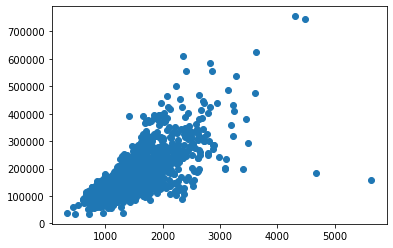

In [82]:
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.show()

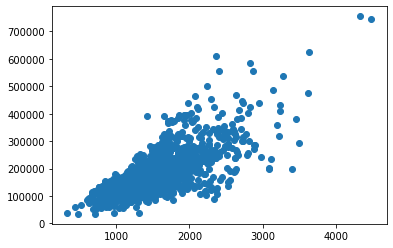

In [83]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
Y_train = df_train['SalePrice'].values
plt.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.show()

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

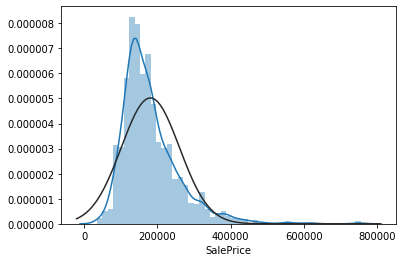

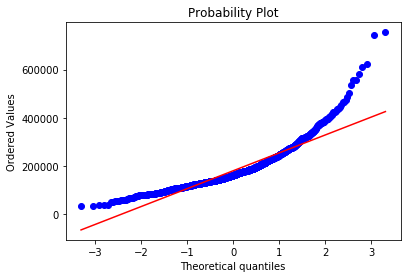

In [84]:
plt.show()
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3985320692976512, 12.024008660964794, 0.9953918648311367))

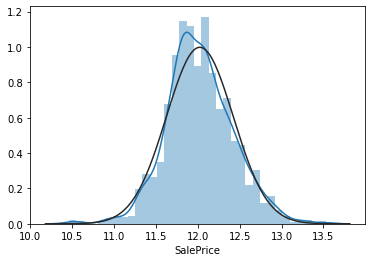

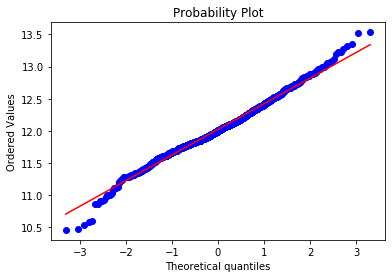

In [85]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt)

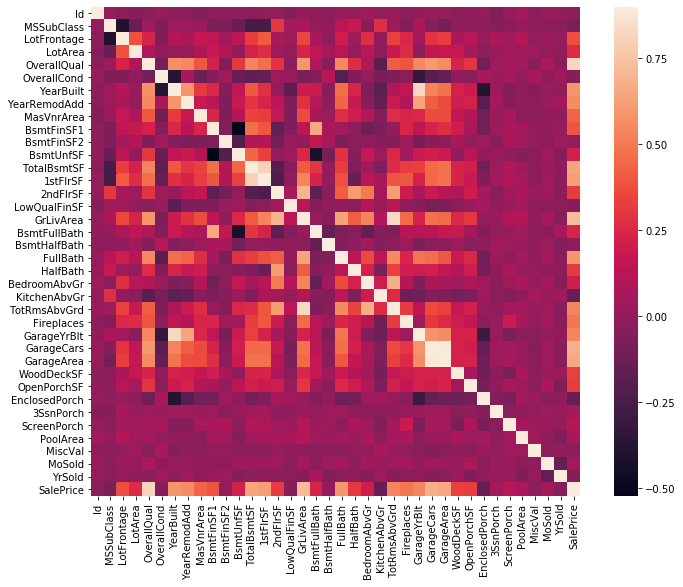

In [86]:
corrmat = df_train.corr() #Compute pairwise correlation of columns, excluding NA/null values.
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [87]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
X = pd.concat((df_train, df_test), sort = False).reset_index(drop=True)
X = X.drop("SalePrice", axis = 1)
X_na = (X.isna().sum()/len(X))*100
X_na = X_na.drop(X_na[X_na == 0].index)
X_na.sort_values(ascending=False)

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Exterior2nd      0.034282
Exterior1st      0.034282
SaleType         0.034282
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
Electrical       0.034282
KitchenQual      0.034282
GarageCars       0.034282
GarageArea       0.034282
TotalBsmtSF      0.034282
dtype: float64

In [88]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'):
  X[col] = X[col].fillna('None')

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    X[col] = X[col].fillna('None')

X["LotFrontage"] = X["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
  X[col] = X[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
  X[col] = X[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  X[col] = X[col].fillna('None')

X["MasVnrType"] = X["MasVnrType"].fillna("None")
X["MasVnrArea"] = X["MasVnrArea"].fillna(0)
X['MSZoning'] = X['MSZoning'].fillna(X['MSZoning'].mode()[0])
X = X.drop('Utilities', axis = 1)
X["Functional"] = X["Functional"].fillna("Typ")
X['Electrical'] = X['Electrical'].fillna(X['Electrical'].mode()[0])
X['KitchenQual'] = X['KitchenQual'].fillna(X['KitchenQual'].mode()[0])
X['Exterior1st'] = X['Exterior1st'].fillna(X['Exterior1st'].mode()[0])
X['Exterior2nd'] = X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0])
X['SaleType'] = X['SaleType'].fillna(X['SaleType'].mode()[0])
X['MSSubClass'] = X['MSSubClass'].fillna("None")
X['MSZoning'] = X['MSZoning'].replace('C (all)', 'C')
X = X.drop("Id", axis = 1)
X = X.drop('Neighborhood', axis=1)

In [89]:
X_na = (X.isna().sum()/len(X))*100
X_na = X_na.drop(X_na[X_na == 0].index)
X_na.sort_values(ascending=False)

Series([], dtype: float64)

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'GarageYrBlt', 'YearBuilt')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X[c].values)) 
    X[c] = lbl.transform(list(X[c].values))

X = pd.get_dummies(X)

In [93]:
from sklearn.linear_model import Lasso
X_train = X[:ntrain]
X_test = X[ntrain:]
model = Lasso(alpha = 0.1, max_iter = 100000)
model.fit(X_train, Y_train)
Id = df_test['Id'].values
Y_test = model.predict(X_test)
d = {
    'Id':Id,
     'SalePrice':Y_test
}
result = pd.DataFrame(data=d)
result
result.to_csv('result.csv')
files.download('result.csv')

AttributeError: 'NoneType' object has no attribute 'download'